In [1]:
import ring
import numpy as np
import qmt
import imt
import mediapy
import tree
import jax

In [2]:
path_pkl = "/Users/simon/Downloads/STS/STS_TK_correct1.pickle"
data = ring.utils.pickle_load(path_pkl)

In [3]:
graph = [-1, 0, 0, 2, 3, 0, 5, 6]
body_names = ["hip", "sternum", "r_thigh", "r_shank", "r_foot", "l_thigh", "l_shank", "l_foot"]
imu_to_body_convention = ['10B40AFE','10B40B14', "10B40AF8", "10B40AF4", "10B40AFA", "10B40AF9", "10B40B15", "10B40AF7"]

In [4]:
imt.utils.print_graph(graph, body_names)

-1 (Earth)
|
hip
├── sternum
├── r_thigh
│   └── r_shank
│       └── r_foot
└── l_thigh
    └── l_shank
        └── l_foot


In [5]:
imu_data = {
    body_names[i]: dict(acc=data[imu][["Acc_X", "Acc_Y", "Acc_Z"]], gyr=data[imu][["Gyr_X", "Gyr_Y", "Gyr_Z"]], mag=data[imu][["Mag_X", "Mag_Y", "Mag_Z"]])
    for i, imu in enumerate(imu_to_body_convention)
}
imu_data = tree.map_structure(lambda df: df.to_numpy(), imu_data)

ioe = imt.methods.VQF(offline=True)
dof1 = imt.methods.JointPosition(ioe, dof_is_1d=True)
dof2 = imt.methods.JointPosition(ioe)
qhat, extras = imt.Solver(graph, [imt.methods.DeadReckoning(ioe, zvu=True), dof1] + [dof2, dof1, dof1]*2, 0.01, body_names).step(imu_data)

In [6]:
pos = extras["hip"]["dead-reckoning-position"] + np.array([0, 0, 0.6])

To save the video permanently, provide the path to where the .mp4 is  saved by specifying `offscreen_mode_options=dict(output_path=...)`



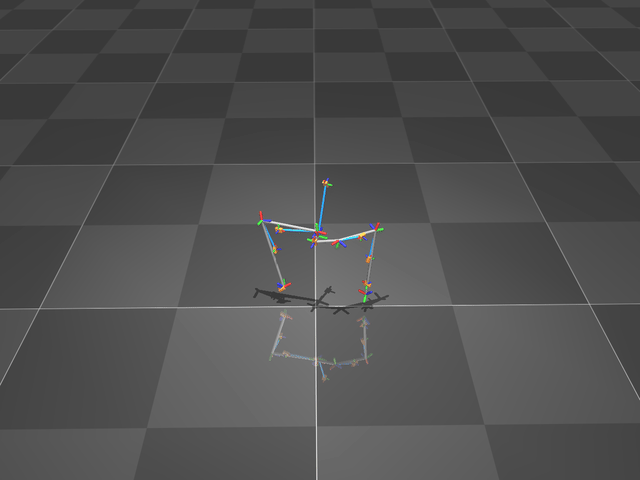

In [7]:
imt.utils.view(graph, qhat, extras, 100, global_translation=pos, show_every_nth_frame=10, height=480, width=640, 
               body_names=body_names, mode="offscreen", offscreen_mode_options=dict(camid=2, github=True))

Also open the interactive viewer.

In [ ]:
imt.utils.view(graph, qhat, extras, 100, global_translation=pos, show_every_nth_frame=4, body_names=body_names)